# Arithmetics Operations

In this notebook we will cover **arithmetic operations** wich includes addition, subtraction and multiplication of images by a scalar. We will also take a look at some unexpected results that acurr when performing such operations and how to resolve them.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

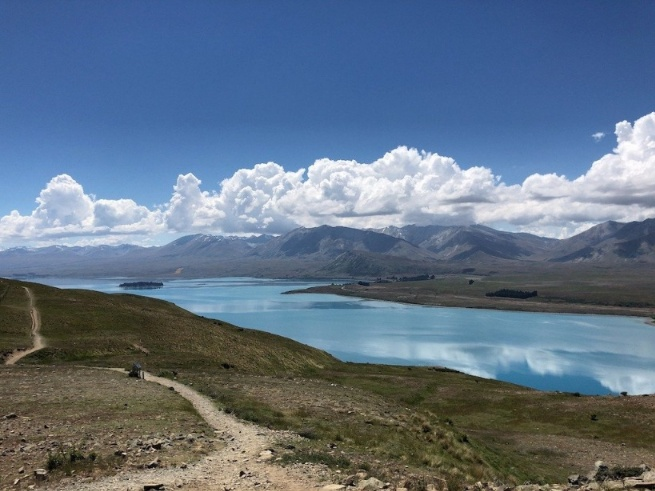

In [2]:
# Read and display original image.
image = "../module02/new-zealand-lake.jpg"
img = cv2.imread(image, cv2.IMREAD_COLOR)

# Display the image.
Image(filename=image, width='400')

### Addition / Subtraction: Changes the Image Brightness

Adding a contrast value to the intensity of each pixel in an image will increase the brightness of the image. Likewise, subtracting a contrast value from each pixel will decrease the brightness of an image. We can use the **add()** and **subtract()** functions in OpenCV to perform these operations on iamges.

These two funtions have the same syntax in OpenCV, these have two required arguments:

1. src1: The first image
2. src2: The second image

These are the two images we are going to add or subtract.

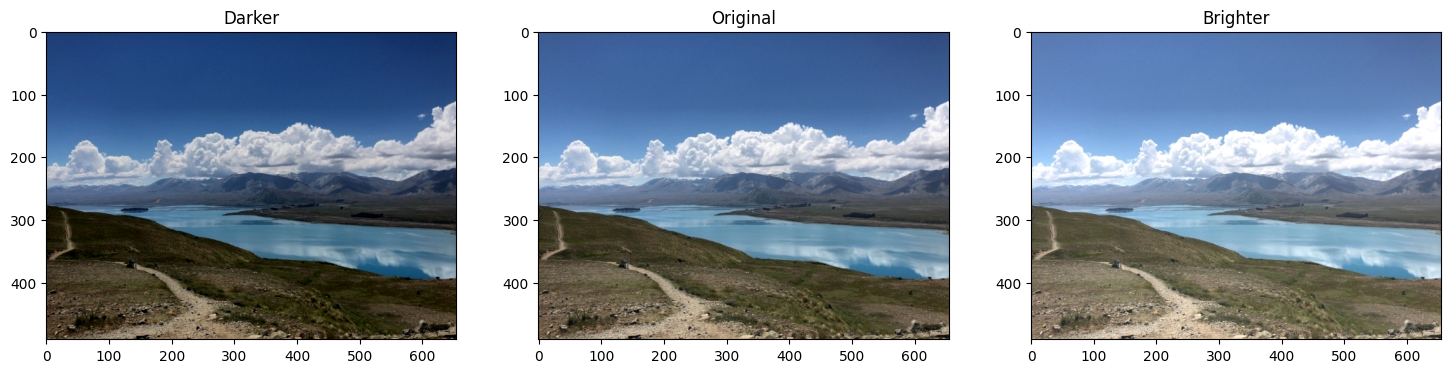

In [3]:
# Adjust the brightness of an image.
# Create a matrix with contrast intensity.
matrix = np.ones(img.shape, dtype='uint8') * 30

# Create brighter and darker images.
img_brighter = cv2.add(img, matrix)
img_darker = cv2.subtract(img, matrix)

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_darker[:, :, ::-1]); plt.title("Darker")
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title("Original")
plt.subplot(133); plt.imshow(img_brighter[:, :, ::-1]); plt.title("Brighter");

### Multiplication: Changes the Image Contrast

Multiplying the intensity values of an image by a constant value (grater or less than 1) will change the contrast of the image. Contrast is defined by the difference in the intensity values within an image.

In OpenCV there is a multiply function, the required arguments are:

1. src1: The first image
2. src2: The second image

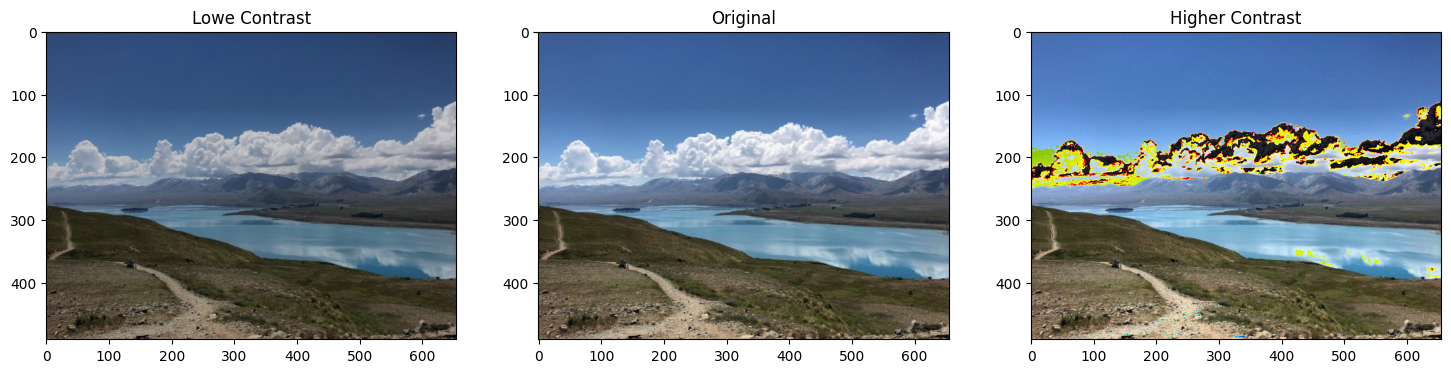

In [5]:
# Modify the image contrast.
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(cv2.multiply(np.float64(img), matrix2))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title("Lowe Contrast")
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title("Original")
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title("Higher Contrast");

The reason of the output of the image with higher contrast is when we created this higher contrast image we multiply the original image by a factor of 1.2 and that resulted in some pixel intensities that actually exceeded 255 which is an overflow condition.

And the way thar **np.uint8()** function handles that condition it takes any values grater than 255 and rolls them over to zero again, so that results in pixel intensities that are now closer than zero which at this point don't make any sense.

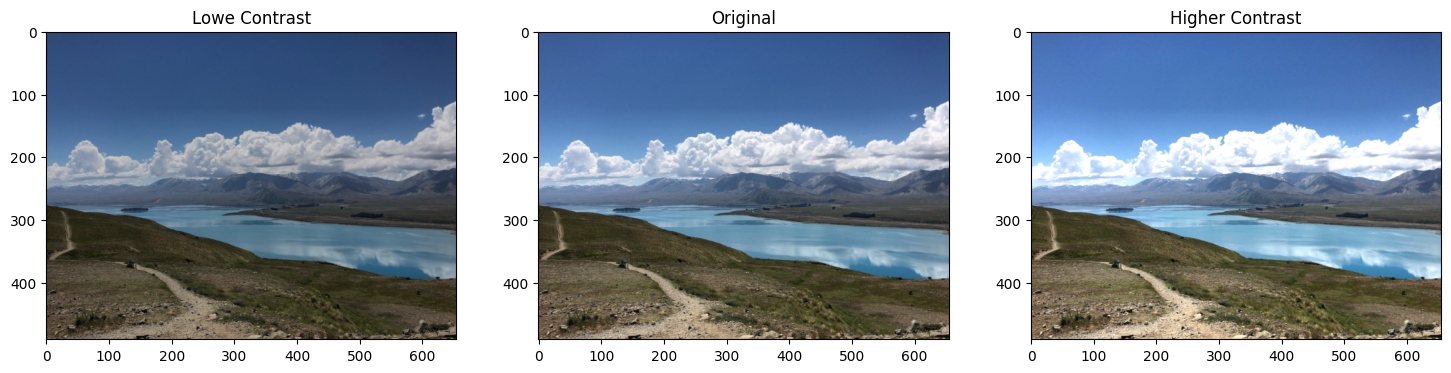

In [6]:
# Create matrices with a constant scale factor.
matrix1 = np.ones(img.shape) * 0.8
matrix2 = np.ones(img.shape) * 1.2

# Create lower and higher contrast images.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix1))
img_higher = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix2), 0, 255))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title("Lowe Contrast")
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title("Original")
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title("Higher Contrast");

### Using the scale option

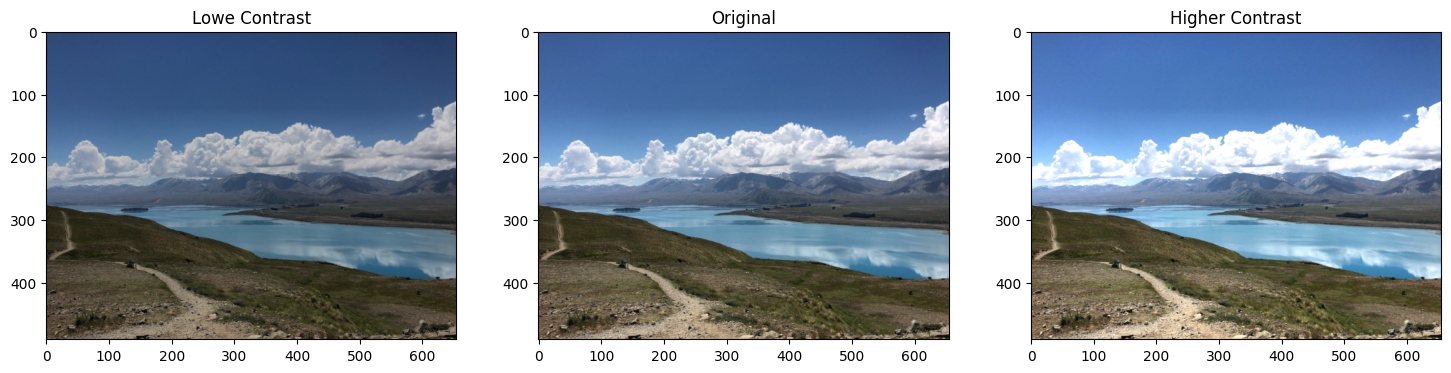

In [10]:
# Create matrices with a constant scale factor.
matrix_ones = np.ones(img.shape, dtype="float64")

# Create lower and higher contrast images.
img_lower = np.uint8(cv2.multiply(np.float64(img), matrix_ones, scale=0.8))
img_higher = np.uint8(np.clip(cv2.multiply(np.float64(img), matrix_ones, scale=1.2), 0, 255))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(img_lower[:, :, ::-1]); plt.title("Lowe Contrast")
plt.subplot(132); plt.imshow(img[:, :, ::-1]); plt.title("Original")
plt.subplot(133); plt.imshow(img_higher[:, :, ::-1]); plt.title("Higher Contrast");

### Exercice

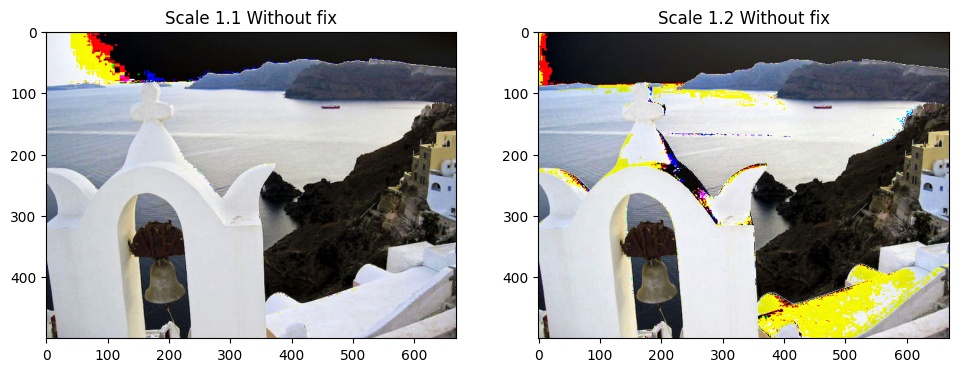

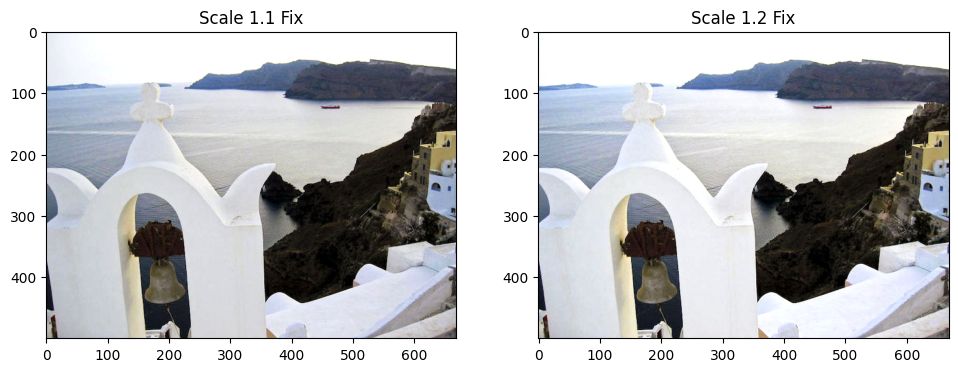

In [16]:
image = cv2.imread("../module02/Santorini.jpg", cv2.IMREAD_COLOR)

matrix = np.ones(image.shape, dtype="float64")

# Without overflow fix
hight_contrast1 = np.uint8(cv2.multiply(np.float64(image), matrix, scale=1.1))
hight_contrast2 = np.uint8(cv2.multiply(np.float64(image), matrix, scale=1.2))

# With overflow fix

hight_contrast3 = np.uint8(np.clip(cv2.multiply(np.float64(image), matrix, scale=1.1), 0, 255))
hight_contrast4 = np.uint8(np.clip(cv2.multiply(np.float64(image), matrix, scale=1.2), 0, 255))

# Display the images.
plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(hight_contrast1[:, :, ::-1]); plt.title("Scale 1.1 Without fix")
plt.subplot(132); plt.imshow(hight_contrast2[:, :, ::-1]); plt.title("Scale 1.2 Without fix")

plt.figure(figsize=(18, 5))
plt.subplot(131); plt.imshow(hight_contrast3[:, :, ::-1]); plt.title("Scale 1.1 Fix")
plt.subplot(132); plt.imshow(hight_contrast4[:, :, ::-1]); plt.title("Scale 1.2 Fix");